In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpg = pd.read_csv('./input/mpg.csv')
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

In [4]:
# mpg 테이터에서 drv(구동방식)별 hwy(고속도로연비) 평균을 나타낸 막대그래프를 만듬

# 1) 집단별 평균표 만들기
# 평균 막대 그래프를 만들려면 집단별 평균값을 담은 데이터 프레임이 필요
# 구동 방식별 고속도로 연비 평균을 담은 데이터 프레임을 만듬
# drv별로 분리하고 hwy평균 구하기
# agg(mean_hwy=('hwy', 'mean')) -> mean_hwy 열을 생성하면서 hwy열의 평균값을 입력
df_mpg = mpg.groupby('drv').agg(mean_hwy=('hwy', 'mean')) # drv기준으로 묶고 hwy컬럼의 mean() 평균을 mean_hwy열을 생성하며 그열에 입력 
df_mpg

mean_hwy
drv           
4    19.174757
f    28.160377
r    21.000000

In [5]:
#출력 결과를 보면 집단을 나타낸 변수 drv가 인덱스로 바뀌어 mean_hwy 아래에 표시
# seabron으로 그래프를 만들려면 값이변수에 담겨있어야함
# -> 인덱스가 아니라 열로 만들어져야함
# 변수를 인덱스로 바꾸지 않고 원래대로 유지 하려면 groupby()에 as_index = False를입력

df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy=('hwy', 'mean'))
df_mpg

drv   mean_hwy
0   4  19.174757
1   f  28.160377
2   r  21.000000

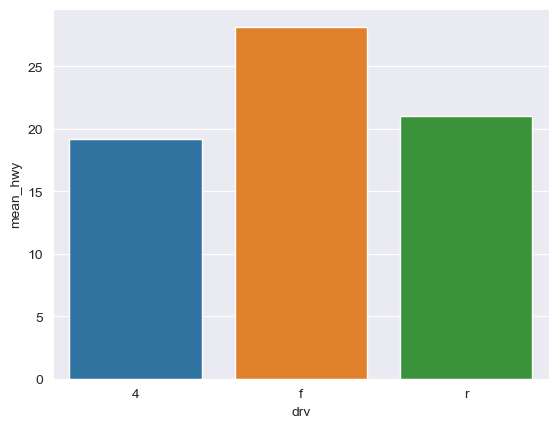

In [6]:
# 2) 그래프 만들기
# 생성된 데이터 프레임을 이용해 막대 그래프를 만듬
# sns.barplot() : 막대 그래프를 만들떄 사용
# data : 데이터 프레임을 지정
# x : x축 범주를 나타내는 변수
# y : y축에 평균ㄱ밧을 나타낸 변수

sns.barplot(data=df_mpg ,x='drv', y='mean_hwy')
plt.show()

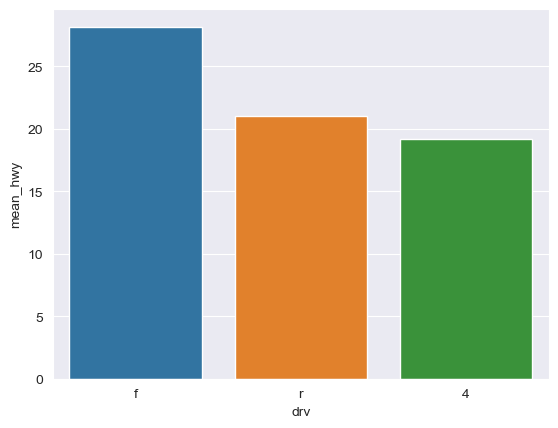

In [7]:
# 3) 크기순으로 정렬하기
#막대 정렬 순서는 그래프를 만드는데 사용한 데이터 프레임의 행 순서에 따라 정해짐
# 앞에 출력한 그래프를 보면 drv 막대가 4 f, r순으로 정렬
#크기 순으로 정렬하려면 그래프를 만들기 전에 df.sort_values()를 이용해 데이터 프레임을 내림차순으로 정렬

# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values(by='mean_hwy', ascending=False)
# 막대그래프 만들기
sns.barplot(data=df_mpg ,x='drv', y='mean_hwy')
plt.show()

In [8]:
# 1) 집단별 빈도표 만들기
# 빈도 막대의 그래프를 만들려면 집단별 빈도를 담은데이터 프레임이 필요
# df.agg()에 빈도를 구하는 함수 count를 적용해 구동방식별 빈도를 담은 데이터 프레임을 만든

# 집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index=False).agg(n=('drv', 'count'))
df_mpg

drv    n
0   4  103
1   f  106
2   r   25

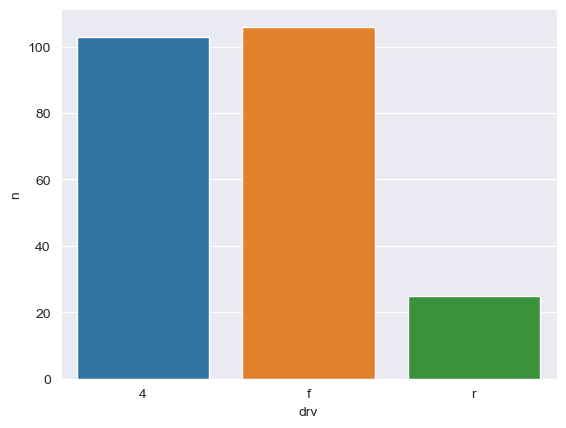

In [9]:
# 2) 그래프 만들기
# sns.barolot()를 적용해 막대 그래프 만듬

# 막대 그래프 만들기
sns.barplot(data=df_mpg ,x='drv', y='n')
plt.show()

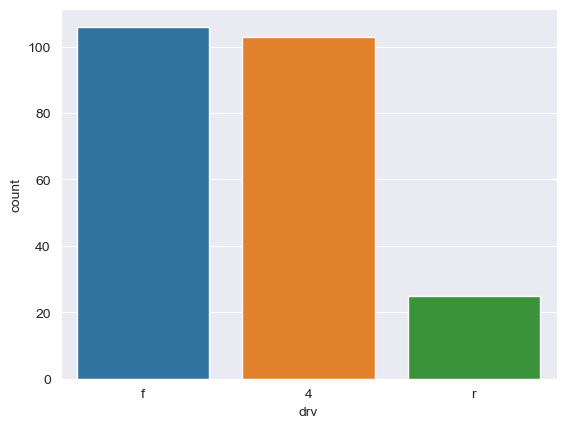

In [10]:
# sns.barplot()사용 할떄 df.groupby()와 df.agg를 이용해 집단별 빈도표를 만드는 작업을 했음
# 대신 sns.coutplot()를 이용하면 원데이터를 바로 이용해 빈도 막대 그래프를 만드수있음


# 빈도 막대 그래프 만들기
sns.countplot(data=mpg ,x='drv')
plt.show()

In [ ]:
# 두 그래프는 x축의 순서가다름
# sns.barplot()으로 만든 그래프는 x축 순서가  4, f, r 인 반면
# sns.countplot()로 만든 그래프는  f 4 r
# 이는 sns.barplot()에 사용한 df_mpg와 sns.countplot()에 사용한 mpg의 drv값 순서가 다르기 떄문

In [11]:
# 데이터 프레임에서 변수의 값 순서는 데이터 프레임에 입력된 행의 순서에 따름
# mpg의 drv는 0~6행이 f, 7~17행이 4, 18~27이 r로 되어있으므로 값의 순서는 f 4 r
# 변수의 고유값을 출력하는 unique()를 이용하면 값의 순서를 알수있음
mpg['drv'].unique() # f 4 r

array(['f', '4', 'r'], dtype=object)

In [ ]:
# df_mpg의 drv는 값의 순서가 알파벳 순으로 되어있음
# groupby()를 이용해 데이터 프레임을 요약하면 값의 순서가 알파벳순으로 바뀌기떄문

df_mpg['drv'].unique() # 4 f r

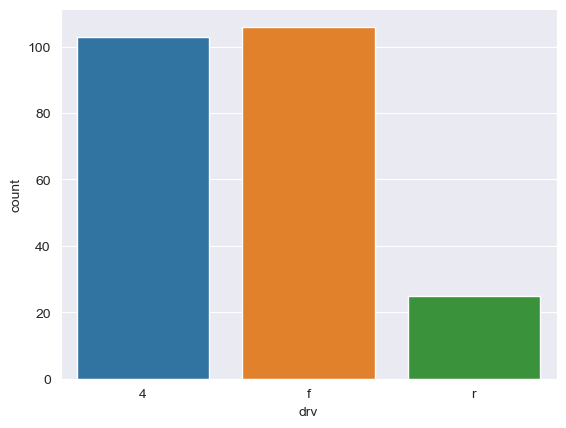

In [12]:
# 3) 막대 정렬하기
# sns.countplot()으로 만든 그래프의 막대를 정렬하면 order에 원하는 순서로 값을 입력하면됨

# 4 f r 순으로 막대 정렬
sns.countplot(data=mpg, x='drv', order=['4', 'f', 'r'])
plt.show()

In [15]:
#sns.countplot()의 order에 mpg['drv'].value_counts().index를 입력하면
# drv의 빈도가 높은 순으로 막대를 정렬
# mpg['drv'].value_counts().index 는 빈도가 높은 순으로 변수의 값을 출력

# drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

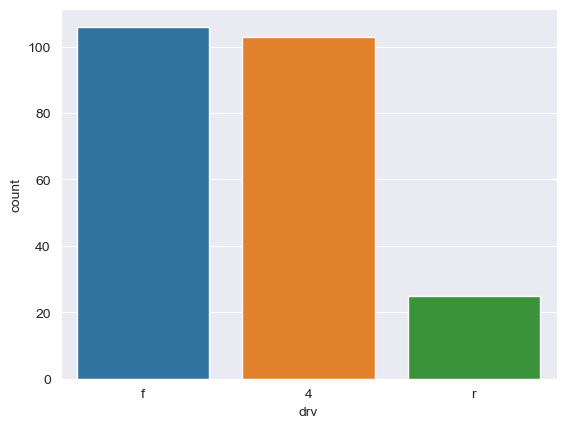

In [16]:
#drv 빈도 높은순으로 막대 정렬
sns.countplot(data=mpg, x='drv', order=mpg['drv'].value_counts().index)
plt.show()